# Assignment 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data:

In [3]:
# Load the data:
data = pd.read_csv("A4_data.csv")

print(f"Number of samples: {len(data)}")
print(f"Number of variables: {len(data.columns)}")

# Show first five samples:
data.head()

Number of samples: 118
Number of variables: 8


,Date,z2000,z2800,z4000,z4200,CPI,obl30yr,nat_tres_lend_rate
0,1992 Q1,5183,6937,5129,3590,63.966667,10.226667,9.920000
1,1992 Q2,5626,6670,5251,3861,64.633333,10.330000,10.000000
2,1992 Q3,6980,6400,5201,3707,64.633333,10.773333,10.250000
3,1992 Q4,6686,6382,5113,3752,64.800000,10.600000,12.966667
4,1993 Q1,5537,6511,4887,3770,64.766667,10.490000,11.500000


In [4]:
# Separate into training and test:
test = 4
train = len(data) - test

trainData = data.iloc[:train]
testData = data.iloc[train:]

### Plot the prices:

From the below plot all of the differnte aparatment prices seems to be non-stationary, athough some of them seem to be more non-stationary than others. None of the time series seem to be seasonal.

\- **z2000**: These prices has both a changing mean and a changing variance. In the start the variance seems t be rather constant, but it start increasing pretty quickly. For this time series differencing and probably a log transformations seems necessary.

\- **z2800**: By just looking at this time seris it seems to have a somewhat static variance throughout, but it may be that it has smaller variance in the start than in the end. Although the variance seems to be rather stationary, the mean is increasing through the data set making also this non-stationary. Due to the somwhat constant variance it is maybe only necsessary with a differencing of this time series.

\- **z4000**: This time series looks musch like the z2800 one, but with a smaller shift in the mean. Since the variance seems the same throughout the data set, differencing may be the only necessary thing to do in order to make this stationary.

\- **z4200**: This is the one of the time series that looks to be hardest to determine whether or not it is stationary. The variance looks constant through the whole time series, but the means seems to have a slight drift upwards. Here the variance also seem to remain constant, thus only differncing seems nescessary.

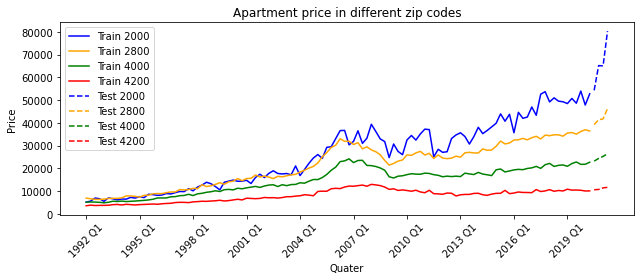

In [5]:
# Plot the prices:
plt.figure(figsize= (9, 4))
plt.plot(trainData.Date, trainData.z2000, color= "blue"), plt.plot(trainData.Date, trainData.z2800, color= "orange"),
plt.plot(trainData.Date, trainData.z4000, color= "green"), plt.plot(trainData.Date, trainData.z4200, color= "red"),
plt.plot(testData.Date, testData.z2000, "--", color= "blue")
plt.plot(testData.Date, testData.z2800, "--", color= "orange")
plt.plot(testData.Date, testData.z4000, "--", color= "green")
plt.plot(testData.Date, testData.z4200, "--", color= "red")
plt.legend(["Train 2000", "Train 2800", "Train 4000", "Train 4200",
            "Test 2000", "Test 2800", "Test 4000", "Test 4200"])
plt.xticks([date for date in range(0, len(data), 12)], rotation= 45);
plt.title("Apartment price in different zip codes"), plt.xlabel("Quater"), plt.ylabel("Price");
plt.tight_layout()

# Save plot:
plt.savefig("figures/prices.png", dpi= 300)


### Plot the interest rates:
None of the interest rates looks to be stationary. The main thing to notice from these interest rates is that the one of Nationalbanken looks to have a larger variance than the 30 year real estate bond rate. The 30 year real estate bond rate also looks to have a constant variance, while the one from nationalbanken looks to have larger variance in the start than in the end.

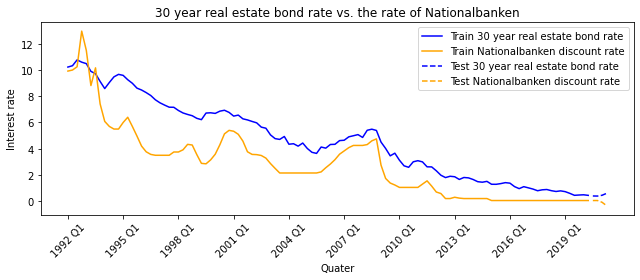

In [6]:
# Plot the interest rates:
plt.figure(figsize= (9, 4))
plt.plot(trainData.Date, trainData.obl30yr, color= "blue"), plt.plot(trainData.Date, trainData.nat_tres_lend_rate, color= "orange"),
plt.plot(testData.Date, testData.obl30yr, "--", color= "blue"), plt.plot(testData.Date, testData.nat_tres_lend_rate, "--", color= "orange"),
plt.title("30 year real estate bond rate vs. the rate of Nationalbanken")
plt.legend(["Train 30 year real estate bond rate", "Train Nationalbanken discount rate",
            "Test 30 year real estate bond rate", "Test Nationalbanken discount rate"])
plt.xticks([date for date in range(0, len(data), 12)], rotation= 45);
plt.xlabel("Quater")
plt.ylabel("Interest rate")
plt.tight_layout()

# Save plot:
plt.savefig("figures/interestRates.png", dpi= 300)

### Plot the consumer price index:

The price consumer index is also a non-stationary time series. The mean of the time series are increasing through the time series. WHen it comes to the variance this seem to be rather stationary in this case.

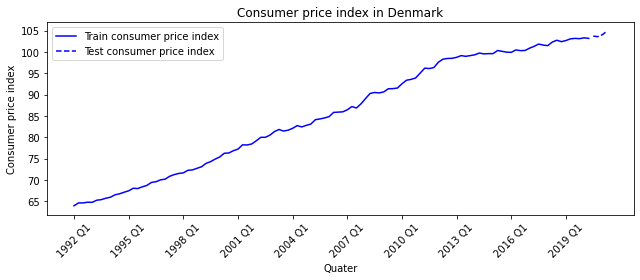

In [7]:
# Plot the consumer price index:
plt.figure(figsize= (9, 4))
plt.plot(trainData.Date, trainData.CPI, color= "blue")
plt.plot(testData.Date, testData.CPI, "--", color= "blue")
plt.title("Consumer price index in Denmark")
plt.xlabel("Quater")
plt.ylabel("Consumer price index");
plt.xticks([date for date in range(0, len(data), 12)], rotation= 45);
plt.legend(["Train consumer price index", "Test consumer price index"])
plt.tight_layout()

# Save plot:
plt.savefig("figures/CPI.png", dpi= 300)

## ACF, PACF and CCF:

### ACF:

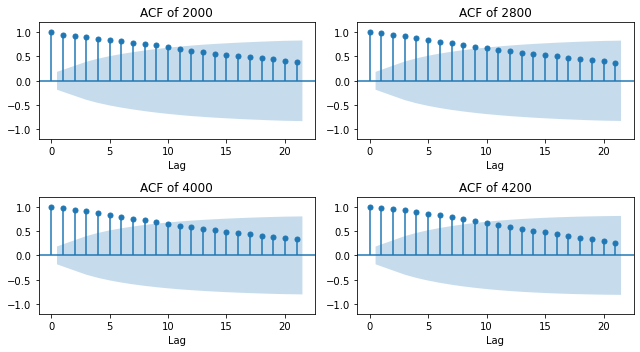

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF:
fig = plt.figure(figsize= (9, 5))

ax1 = plt.subplot(221)
plot_acf(trainData.z2000, ax1);
ax1.set_title("ACF of 2000"), ax1.set_ylim(-1.2, 1.2), ax1.set_xlabel("Lag")

ax2 = plt.subplot(222)
plot_acf(trainData.z2800, ax2);
ax2.set_title("ACF of 2800"), ax2.set_ylim(-1.2, 1.2), ax2.set_xlabel("Lag")

ax3 = plt.subplot(223)
plot_acf(trainData.z4000, ax3);
ax3.set_title("ACF of 4000"), ax3.set_ylim(-1.2, 1.2), ax3.set_xlabel("Lag")

ax4 = plt.subplot(224)
plot_acf(trainData.z4200, ax4);
ax4.set_title("ACF of 4200"), ax4.set_ylim(-1.2, 1.2), ax4.set_xlabel("Lag")

plt.tight_layout()

# Save:
plt.savefig("figures/ACFPrices.png", dpi= 300)

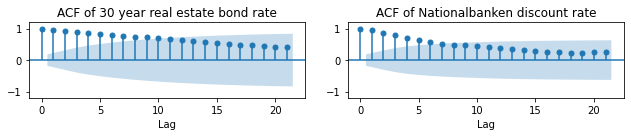

In [9]:
# Plot ACF of intererest rates:
plt.figure(figsize= (9, 2))
ax1 = plt.subplot(121)
plot_acf(trainData.obl30yr, ax1);
ax1.set_title("ACF of 30 year real estate bond rate"), ax1.set_xlabel("Lag"), ax1.set_ylim(-1.2, 1.2)

ax2 = plt.subplot(122)
plot_acf(trainData.nat_tres_lend_rate, ax2);
ax2.set_title("ACF of Nationalbanken discount rate"), ax2.set_xlabel("Lag"), ax2.set_ylim(-1.2, 1.2)

plt.tight_layout()

# Save plot:
plt.savefig("figures/ACFinterest.png", dpi= 300)

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


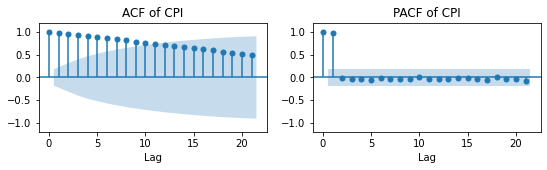

In [10]:
# Plot ACF of CPI:
plt.figure(figsize= (9, 2))
ax1 = plt.subplot(121)
plot_acf(trainData.CPI, ax1);
ax1.set_title("ACF of CPI"), ax1.set_xlabel("Lag"), ax1.set_ylim(-1.2, 1.2)

ax2 = plt.subplot(122)
plot_pacf(trainData.CPI, ax2);
ax2.set_title("PACF of CPI"), ax2.set_xlabel("Lag"), ax2.set_ylim(-1.2, 1.2)

# Save plot:
plt.savefig("figures/ACFPACFcpi.png", dpi= 300)


### PACF:

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by s

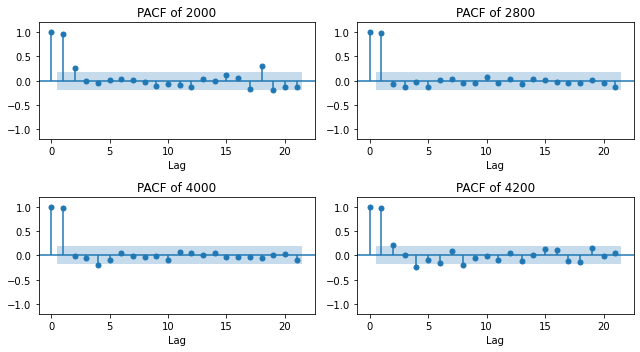

In [11]:
# Plot PACF:
fig = plt.figure(figsize= (9, 5))

ax1 = plt.subplot(221)
plot_pacf(trainData.z2000, ax1);
ax1.set_title("PACF of 2000"), ax1.set_ylim(-1.2, 1.2), ax1.set_xlabel("Lag")

ax2 = plt.subplot(222)
plot_pacf(trainData.z2800, ax2);
ax2.set_title("PACF of 2800"), ax2.set_ylim(-1.2, 1.2), ax2.set_xlabel("Lag")

ax3 = plt.subplot(223)
plot_pacf(trainData.z4000, ax3);
ax3.set_title("PACF of 4000"), ax3.set_ylim(-1.2, 1.2), ax3.set_xlabel("Lag")

ax4 = plt.subplot(224)
plot_pacf(trainData.z4200, ax4);
ax4.set_title("PACF of 4200"), ax4.set_ylim(-1.2, 1.2), ax4.set_xlabel("Lag")

plt.tight_layout()

# Save:
plt.savefig("figures/PACFPrices.png", dpi= 300)

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


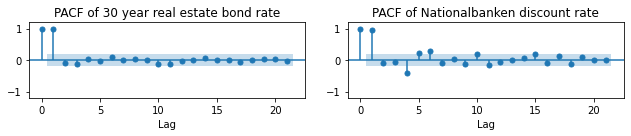

In [12]:
# Plot PACF of interest rate:
plt.figure(figsize= (9, 2))
ax1 = plt.subplot(121)
plot_pacf(trainData.obl30yr, ax1);
ax1.set_title("PACF of 30 year real estate bond rate"), ax1.set_xlabel("Lag"), ax1.set_ylim(-1.2, 1.2)

ax2 = plt.subplot(122)
plot_pacf(trainData.nat_tres_lend_rate, ax2);
ax2.set_title("PACF of Nationalbanken discount rate"), ax2.set_xlabel("Lag"), ax2.set_ylim(-1.2, 1.2)

plt.tight_layout()

# Save plot:
plt.savefig("figures/PACFinterest.png", dpi= 300)

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


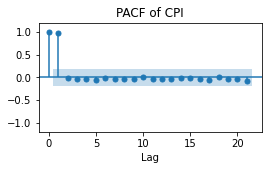

In [13]:
# Plot PACF of CPI:
plt.figure(figsize= (4, 2))
ax = plt.subplot(111)
plot_pacf(trainData.CPI, ax);
ax.set_title("PACF of CPI"), ax.set_xlabel("Lag"), ax.set_ylim(-1.2, 1.2)

# Save plot:
plt.savefig("figures/PACFcpi.png", dpi= 300)


### CCF:

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/236078797.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  trainData.ccf_z2000z2800 = ccf(trainData.z2000, trainData.z2800)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/236078797.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  trainData.ccf_z2000z4000 = ccf(trainData.z2000, trainData.z4000)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/236078797.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  trainData.ccf_z2000z4200 = ccf(trainData.z2000, trainData.z4200)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/236078

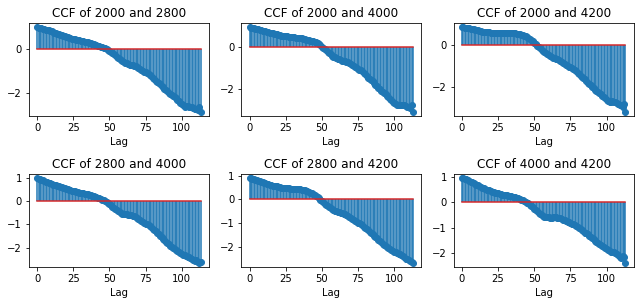

In [14]:
from statsmodels.tsa.stattools import ccf

trainData.ccf_z2000z2800 = ccf(trainData.z2000, trainData.z2800)
trainData.ccf_z2000z4000 = ccf(trainData.z2000, trainData.z4000)
trainData.ccf_z2000z4200 = ccf(trainData.z2000, trainData.z4200)
trainData.ccf_z2800z4000 = ccf(trainData.z2800, trainData.z4000)
trainData.ccf_z2800z4200 = ccf(trainData.z2800, trainData.z4200)
trainData.ccf_z4000z4200 = ccf(trainData.z4000, trainData.z4200)

# Plot:
plt.figure(figsize= (9, 6))
plt.subplot(331), plt.stem(trainData.ccf_z2000z2800), plt.title("CCF of 2000 and 2800"), plt.xlabel("Lag")

plt.subplot(332), plt.stem(trainData.ccf_z2000z4000), plt.title("CCF of 2000 and 4000"), plt.xlabel("Lag")

plt.subplot(333), plt.stem(trainData.ccf_z2000z4200), plt.title("CCF of 2000 and 4200"), plt.xlabel("Lag")

plt.subplot(334), plt.stem(trainData.ccf_z2800z4000), plt.title("CCF of 2800 and 4000"), plt.xlabel("Lag")

plt.subplot(335), plt.stem(trainData.ccf_z2800z4200), plt.title("CCF of 2800 and 4200"), plt.xlabel("Lag")

plt.subplot(336), plt.stem(trainData.ccf_z4000z4200), plt.title("CCF of 4000 and 4200"), plt.xlabel("Lag")

plt.tight_layout()

# Save plot:
plt.savefig("figures/CCFPrices.png", dpi= 300)

## Transform prices using CPI:
The prices for the different year can be adjusted based on the consumer price index. This will take inflation into account and show the true growth of the different prices. The following formula give the change in price with respect to a given year.
$$
x_t = \frac{y_t}{z_t} * z_{given\_year}
$$

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/430573355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["CPI_z2000"] = trainData.z2000 / trainData.CPI * trainData.CPI.iloc[0]
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/430573355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["CPI_z2800"] = trainData.z2800 / trainData.CPI * trainData.CPI.iloc[0]
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/430573355.py:3: SettingWithCopyWar

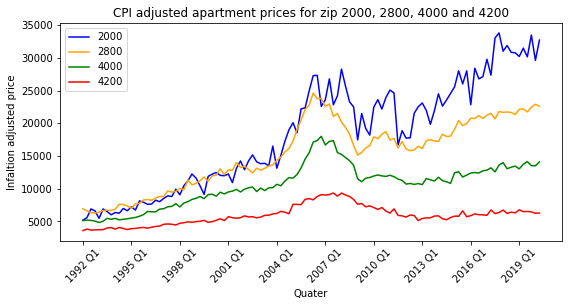

In [49]:
trainData["CPI_z2000"] = trainData.z2000 / trainData.CPI * trainData.CPI.iloc[0]
trainData["CPI_z2800"] = trainData.z2800 / trainData.CPI * trainData.CPI.iloc[0]
trainData["CPI_z4000"] = trainData.z4000 / trainData.CPI * trainData.CPI.iloc[0]
trainData["CPI_z4200"] = trainData.z4200 / trainData.CPI * trainData.CPI.iloc[0]

testData["CPI_z2000"] = testData.z2000 / testData.CPI * trainData.CPI.iloc[0]
testData["CPI_z2800"] = testData.z2800 / testData.CPI * trainData.CPI.iloc[0]
testData["CPI_z4000"] = testData.z4000 / testData.CPI * trainData.CPI.iloc[0]
testData["CPI_z4200"] = testData.z4200 / testData.CPI * trainData.CPI.iloc[0]

plt.figure(figsize= (9, 4))
plt.plot(trainData.Date, trainData.CPI_z2000, color="blue"),
plt.plot(trainData.Date, trainData.CPI_z2800, color= "orange") 
plt.plot(trainData.Date, trainData.CPI_z4000, color= "green")
plt.plot(trainData.Date, trainData.CPI_z4200, color= "red")
plt.legend(["2000", "2800", "4000", "4200"])
plt.title("CPI adjusted apartment prices for zip 2000, 2800, 4000 and 4200")
plt.xticks([date for date in range(0, len(data), 12)], rotation= 45);
plt.xlabel("Quater"), plt.ylabel("Infaltion adjusted price")

# Save figure:
plt.savefig("figures/CPIprices.png", dpi= 300)

## Transformation of the data series:

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/2649105254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_z2000"] = np.log(trainData.CPI_z2000)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/2649105254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_z2800"] = np.log(trainData.CPI_z2800)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/2649105254.py:4: SettingWithCopyWarning: 
A value is trying to be set on

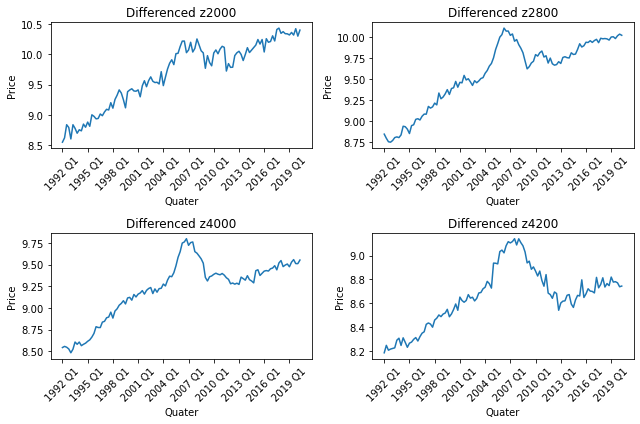

In [84]:
# Log transform the data:
trainData["transformed_z2000"] = np.log(trainData.CPI_z2000)
trainData["transformed_z2800"] = np.log(trainData.CPI_z2800)
trainData["transformed_z4000"] = np.log(trainData.CPI_z4000)
trainData["transformed_z4200"] = np.log(trainData.CPI_z4200)

# Plot the transformed data:
plt.figure(figsize= (9, 6))
plt.subplot(221)
plt.plot(trainData.Date, trainData.transformed_z2000)
plt.title("Differenced z2000"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(222)
plt.plot(trainData.Date, trainData.transformed_z2800)
plt.title("Differenced z2800"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(223)
plt.plot(trainData.Date, trainData.transformed_z4000)
plt.title("Differenced z4000"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(224)
plt.plot(trainData.Date, trainData.transformed_z4200)
plt.title("Differenced z4200"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.tight_layout()

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/3160343483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_differenced_z2000"] = diff(trainData.transformed_z2000, diff_order)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/3160343483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_differenced_z2800"] = diff(trainData.transformed_z2800, diff_order)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/3160343483.p

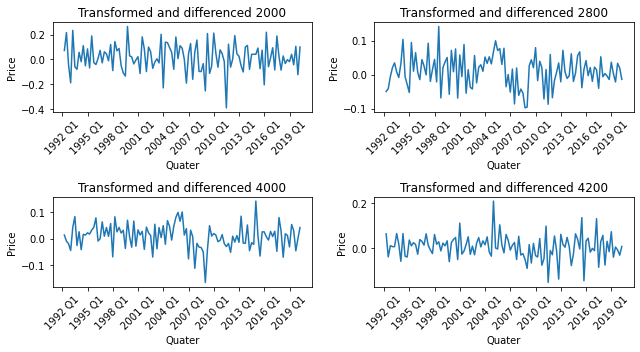

In [85]:
from statsmodels.tsa.statespace.tools import diff

diff_order = 1

# Difference the data:
trainData["transformed_differenced_z2000"] = diff(trainData.transformed_z2000, diff_order)
trainData["transformed_differenced_z2800"] = diff(trainData.transformed_z2800, diff_order)
trainData["transformed_differenced_z4000"] = diff(trainData.transformed_z4000, diff_order)
trainData["transformed_differenced_z4200"] = diff(trainData.transformed_z4200, diff_order)

# Plot the transformed data:
plt.figure(figsize= (9, 5))
plt.subplot(221)
plt.plot(trainData.Date, trainData.transformed_differenced_z2000)
plt.title("Transformed and differenced 2000"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(222)
plt.plot(trainData.Date, trainData.transformed_differenced_z2800)
plt.title("Transformed and differenced 2800"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(223)
plt.plot(trainData.Date, trainData.transformed_differenced_z4000)
plt.title("Transformed and differenced 4000"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(224)
plt.plot(trainData.Date, trainData.transformed_differenced_z4200)
plt.title("Transformed and differenced 4200"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.tight_layout()

plt.savefig("figures/DiffTransPrices.png", dpi= 300)

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/3138641095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_obl30yr"] = boxcox(trainData.obl30yr, lmbda= 0.5)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/3138641095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_nat_tres_lend_rate"] = boxcox(trainData.nat_tres_lend_rate + 20 , lmbda= 0.2)


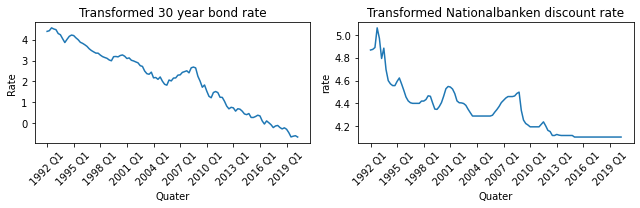

In [86]:
from scipy.stats import boxcox

# Log transform the data:
trainData["transformed_obl30yr"] = boxcox(trainData.obl30yr, lmbda= 0.5)
trainData["transformed_nat_tres_lend_rate"] = boxcox(trainData.nat_tres_lend_rate + 20 , lmbda= 0.2)

# Plot the transformed data:
plt.figure(figsize= (9, 3))
plt.subplot(121)
plt.plot(trainData.Date, trainData.transformed_obl30yr)
plt.title("Transformed 30 year bond rate"), plt.ylabel("Rate"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.subplot(122)
plt.plot(trainData.Date, trainData.transformed_nat_tres_lend_rate)
plt.title("Transformed Nationalbanken discount rate"), plt.ylabel("rate"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);


plt.tight_layout()

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/1273339476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_differenced_obl30yr"] = diff(trainData.transformed_obl30yr, 1)
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_1322/1273339476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData["transformed_differenced_nat_tres_lend_rate"] = diff(trainData.transformed_nat_tres_lend_rate, 1)


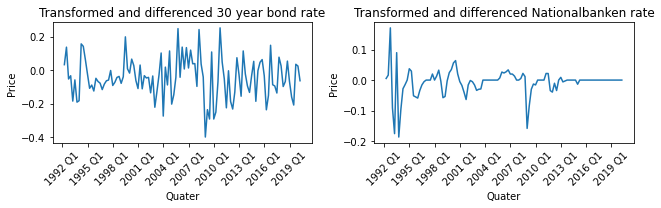

In [87]:
# Difference the data:
trainData["transformed_differenced_obl30yr"] = diff(trainData.transformed_obl30yr, 1)
trainData["transformed_differenced_nat_tres_lend_rate"] = diff(trainData.transformed_nat_tres_lend_rate, 1)

# Plot the transformed data:
plt.figure(figsize= (9, 3))
plt.subplot(121)
plt.plot(trainData.Date, trainData.transformed_differenced_obl30yr)
plt.title("Transformed and differenced 30 year bond rate"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(data), 12)], rotation= 45);

plt.subplot(122)
plt.plot(trainData.Date, trainData.transformed_differenced_nat_tres_lend_rate)
plt.title("Transformed and differenced Nationalbanken rate"), plt.ylabel("Price"), plt.xlabel("Quater")
plt.xticks([date for date in range(0, len(trainData), 12)], rotation= 45);

plt.tight_layout()

As you can see from the above plot differencing the data results in all the prices having the mean centered around zero. But it does not seem as any of the plot actually has the same variance throughout the series. Thus I will use a log transfomration to reduce the variance.

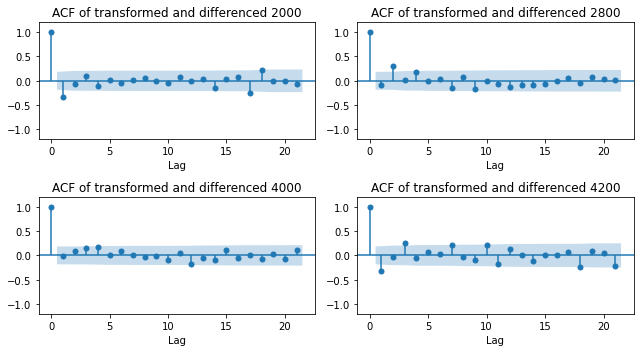

In [88]:
# Plot ACF:
fig = plt.figure(figsize= (9, 5))

ax1 = plt.subplot(221)
plot_acf(trainData.transformed_differenced_z2000.loc[diff_order:], ax1);
ax1.set_title("ACF of transformed and differenced 2000"), ax1.set_ylim(-1.2, 1.2), ax1.set_xlabel("Lag")

ax2 = plt.subplot(222)
plot_acf(trainData.transformed_differenced_z2800.iloc[diff_order:], ax2);
ax2.set_title("ACF of transformed and differenced 2800"), ax2.set_ylim(-1.2, 1.2), ax2.set_xlabel("Lag")

ax3 = plt.subplot(223)
plot_acf(trainData.transformed_differenced_z4000.iloc[diff_order:], ax3);
ax3.set_title("ACF of transformed and differenced 4000"), ax3.set_ylim(-1.2, 1.2), ax3.set_xlabel("Lag")

ax4 = plt.subplot(224)
plot_acf(trainData.transformed_differenced_z4200.iloc[diff_order:], ax4);
ax4.set_title("ACF of transformed and differenced 4200"), ax4.set_ylim(-1.2, 1.2), ax4.set_xlabel("Lag")

plt.tight_layout()

# Save:
plt.savefig("figures/DiffTransACFPrices.png", dpi= 300)

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by s

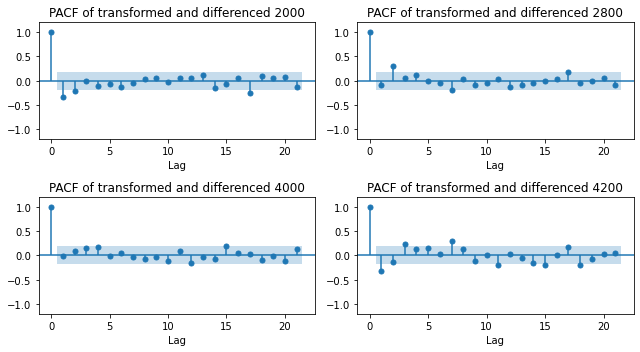

In [89]:
# Plot ACF:
fig = plt.figure(figsize= (9, 5))

ax1 = plt.subplot(221)
plot_pacf(trainData.transformed_differenced_z2000.iloc[diff_order:], ax1);
ax1.set_title("PACF of transformed and differenced 2000"), ax1.set_ylim(-1.2, 1.2), ax1.set_xlabel("Lag")

ax2 = plt.subplot(222)
plot_pacf(trainData.transformed_differenced_z2800.iloc[diff_order:], ax2);
ax2.set_title("PACF of transformed and differenced 2800"), ax2.set_ylim(-1.2, 1.2), ax2.set_xlabel("Lag")

ax3 = plt.subplot(223)
plot_pacf(trainData.transformed_differenced_z4000.iloc[diff_order:], ax3);
ax3.set_title("PACF of transformed and differenced 4000"), ax3.set_ylim(-1.2, 1.2), ax3.set_xlabel("Lag")

ax4 = plt.subplot(224)
plot_pacf(trainData.transformed_differenced_z4200.iloc[diff_order:], ax4);
ax4.set_title("PACF of transformed and differenced 4200"), ax4.set_ylim(-1.2, 1.2), ax4.set_xlabel("Lag")

plt.tight_layout()

# Save:
plt.savefig("figures/DiffTransPACFPrices.png", dpi= 300)

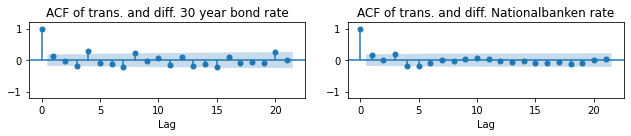

In [90]:
# Plot PACF of interest rate:
plt.figure(figsize= (9, 2))
ax1 = plt.subplot(121)
plot_acf(trainData.transformed_differenced_obl30yr[1:], ax1);
ax1.set_title("ACF of trans. and diff. 30 year bond rate"), ax1.set_xlabel("Lag"), ax1.set_ylim(-1.2, 1.2)

ax2 = plt.subplot(122)
plot_acf(trainData.transformed_differenced_nat_tres_lend_rate[1:], ax2);
ax2.set_title("ACF of trans. and diff. Nationalbanken rate"), ax2.set_xlabel("Lag"), ax2.set_ylim(-1.2, 1.2)

plt.tight_layout()

plt.savefig("figures/DiffTransACFinterest.png", dpi= 300)

## ARIMA model for each of the prices:

In [91]:
from statsmodels.tsa.arima.model import ARIMA

possible_p = [0, 1, 2, 3]
possible_q = [0, 1, 2, 3]

orders = []
AIC = []

for p in possible_p:
    for q in possible_q:
        order = (p, 1, q)
        orders.append(order)
        res = ARIMA(np.array(trainData.transformed_z2000), 
                      order= order, 
                      enforce_stationarity= False,
                      enforce_invertibility= False).fit()
        AIC.append(res.aic)
    

print(f"Order with lowest AIC: {orders[AIC.index(min(AIC))]}, with AIC: {round(min(AIC), 2)}")

Order with lowest AIC: (0, 1, 1), with AIC: -180.59


/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
order = (0, 1, 1)
z2000Model = ARIMA(np.array(trainData.transformed_z2000), 
                 order= order)

z2000_res = z2000Model.fit()

#print(res.summary())

z2000_forecast = z2000_res.get_forecast(len(testData))

In [163]:
possible_p = [0, 1, 2, 3]
possible_q = [0, 1, 2, 3]

orders = []
AIC = []

for p in possible_p:
    for q in possible_q:
        order = (p, 1, q)
        orders.append(order)
        res = ARIMA(np.array(trainData.transformed_z2800), 
                      order= order, 
                      enforce_stationarity= False,
                      enforce_invertibility= False).fit()
        AIC.append(res.aic)

print(f"Order with lowest AIC: {orders[AIC.index(min(AIC))]}, with AIC: {round(min(AIC), 2)}")

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order with lowest AIC: (2, 1, 0), with AIC: -364.69


/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [164]:
order = (2, 1, 0)
z2800Model = ARIMA(np.array(trainData.transformed_z2800), 
                 order= order)

z2800_res = z2800Model.fit()

#print(res.summary())

z2800_forecast = z2800_res.get_forecast(len(testData))

In [165]:
possible_p = [1, 2, 3] 
possible_q = [0, 1, 2, 3]

orders = []
AIC = []

for p in possible_p:
    for q in possible_q:
        order = (p, 1, q)
        orders.append(order)
        res = ARIMA(np.array(trainData.transformed_z4000), 
                      order= order, 
                      enforce_stationarity= False,
                      enforce_invertibility= False).fit()
        AIC.append(res.aic)

print(f"Order with lowest AIC: {orders[AIC.index(min(AIC))]}, with AIC: {round(min(AIC), 2)}")

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order with lowest AIC: (1, 1, 0), with AIC: -364.12


/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [166]:
order = (1, 1, 0)
z4000Model = ARIMA(np.array(trainData.transformed_z4000), 
                   order= order, 
                   trend= 't')

z4000_res = z4000Model.fit()

#print(res.summary())

z4000_forecast = z4000_res.get_forecast(len(testData))

In [167]:
possible_p = [0, 1, 2, 3]
possible_q = [0, 1, 2, 3]

orders = []
AIC = []

for p in possible_p:
    for q in possible_q:
        order = (p, 1, q)
        orders.append(order)
        res = ARIMA(np.array(trainData.transformed_z4200), 
                      order= order, 
                      enforce_stationarity= False,
                      enforce_invertibility= False).fit()
        AIC.append(res.aic)

print(f"Order with lowest AIC: {orders[AIC.index(min(AIC))]}, with AIC: {round(min(AIC), 2)}")

Order with lowest AIC: (1, 1, 2), with AIC: -343.31


In [168]:
order = (1, 1, 2)
z4200Model = ARIMA(np.array(trainData.transformed_z4200), 
                   order= order, 
                   trend= 't', 
                   )

z4200_res = z4200Model.fit()

#print(res.summary())

z4200_forecast = z4200_res.get_forecast(len(testData))

print(np.exp(z4200_forecast.predicted_mean))

[6304.00994329 6266.94788465 6238.18819089 6216.60308075]


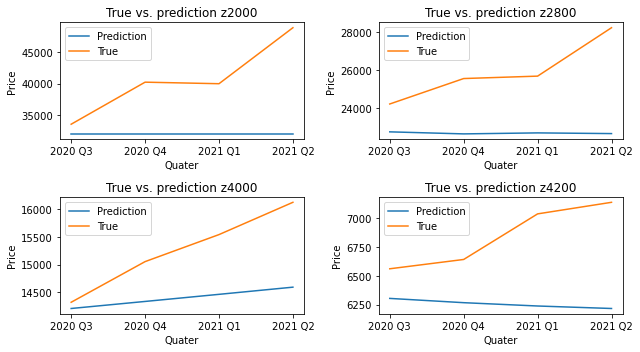

In [169]:
plt.figure(figsize= (9, 5))
plt.subplot(221)
plt.plot(testData.Date, np.exp(z2000_forecast.predicted_mean))
plt.plot(testData.Date, testData.CPI_z2000)
plt.title("True vs. prediction z2000"), plt.xlabel("Quater"), plt.ylabel("Price"), plt.legend(["Prediction", "True"])

plt.subplot(222)
plt.plot(testData.Date, np.exp(z2800_forecast.predicted_mean))
plt.plot(testData.Date, testData.CPI_z2800)
plt.title("True vs. prediction z2800"), plt.xlabel("Quater"), plt.ylabel("Price"), plt.legend(["Prediction", "True"])

plt.subplot(223)
plt.plot(testData.Date, np.exp(z4000_forecast.predicted_mean))
plt.plot(testData.Date, testData.CPI_z4000)
plt.title("True vs. prediction z4000"), plt.xlabel("Quater"), plt.ylabel("Price"), plt.legend(["Prediction", "True"])

plt.subplot(224)
plt.plot(testData.Date, np.exp(z4200_forecast.predicted_mean))
plt.plot(testData.Date, testData.CPI_z4200)
plt.title("True vs. prediction z4200"), plt.xlabel("Quater"), plt.ylabel("Price"), plt.legend(["Prediction", "True"])

plt.tight_layout()

# Save plot:
plt.savefig("figures/PredictionPrices.png", dpi= 300)

### Residual analysis

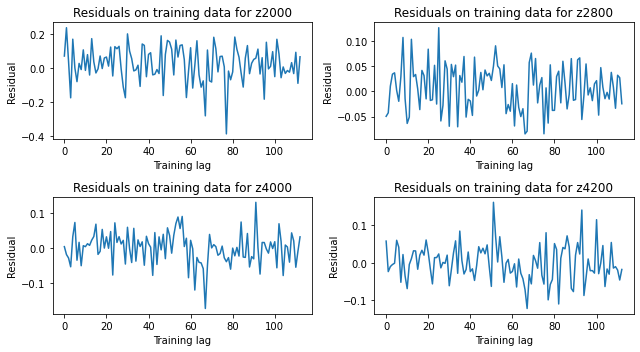

In [170]:
fig = plt.figure(figsize= (9, 5))

plt.subplot(221)
plt.plot(z2000_res.resid[1:]), plt.ylabel("Residual")
plt.title("Residuals on training data for z2000"), plt.xlabel("Training lag")

plt.subplot(222)
plt.plot(z2800_res.resid[1:]), plt.ylabel("Residual")
plt.title("Residuals on training data for z2800"), plt.xlabel("Training lag")

plt.subplot(223)
plt.plot(z4000_res.resid[1:]), plt.ylabel("Residual")
plt.title("Residuals on training data for z4000"), plt.xlabel("Training lag")

plt.subplot(224)
plt.plot(z4200_res.resid[1:]), plt.ylabel("Residual")
plt.title("Residuals on training data for z4200"), plt.xlabel("Training lag")

plt.tight_layout()

plt.savefig("figures/ResiudalsPrices", dpi=  300)

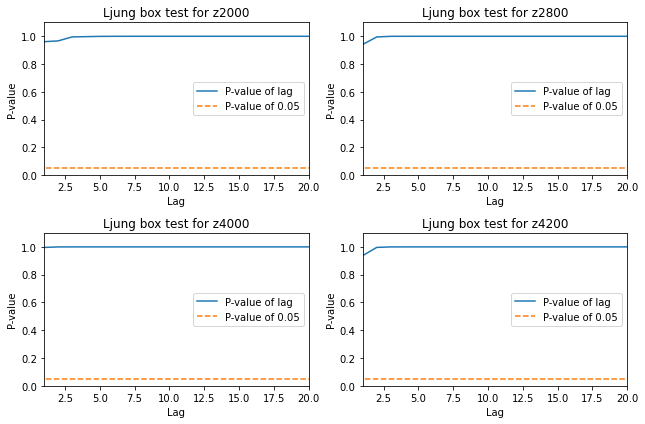

In [172]:
from statsmodels.stats.diagnostic import acorr_ljungbox

z2000_ljungBox = acorr_ljungbox(z2000_res.resid, lags= 20)
z2800_ljungBox = acorr_ljungbox(z2800_res.resid, lags= 20)
z4000_ljungBox = acorr_ljungbox(z4000_res.resid, lags= 20)
z4200_ljungBox = acorr_ljungbox(z4200_res.resid, lags= 20)

# Plot:
plt.figure(figsize= (9, 6))
plt.subplot(221)
z2000_ljungBox.lb_pvalue.plot()
plt.ylim(0, 1.1), plt.xlim(1, len(z2000_ljungBox))
plt.plot(np.ones(21) * 0.05, "--")
plt.title("Ljung box test for z2000"), plt.xlabel("Lag")
plt.ylabel("P-value"), plt.legend(["P-value of lag", "P-value of 0.05"])

plt.subplot(222)
z2800_ljungBox.lb_pvalue.plot()
plt.ylim(0, 1.1), plt.xlim(1, len(z2800_ljungBox))
plt.plot(np.ones(21) * 0.05, "--")
plt.title("Ljung box test for z2800"), plt.xlabel("Lag")
plt.ylabel("P-value"), plt.legend(["P-value of lag", "P-value of 0.05"])

plt.subplot(223)
z4000_ljungBox.lb_pvalue.plot()
plt.ylim(0, 1.1), plt.xlim(1, len(z4000_ljungBox))
plt.plot(np.ones(21) * 0.05, "--")
plt.title("Ljung box test for z4000"), plt.xlabel("Lag")
plt.ylabel("P-value"), plt.legend(["P-value of lag", "P-value of 0.05"])

plt.subplot(224)
z4200_ljungBox.lb_pvalue.plot()
plt.ylim(0, 1.1), plt.xlim(1, len(z4200_ljungBox))
plt.plot(np.ones(21) * 0.05, "--")
plt.title("Ljung box test for z4200"), plt.xlabel("Lag"), 
plt.ylabel("P-value"), plt.legend(["P-value of lag", "P-value of 0.05"])

plt.tight_layout()

plt.savefig("figures/LjungBoxPrices.png", dpi= 300)
